## Loading the MNIST dataset

In [46]:
from keras.datasets import mnist



In [47]:
# Obtaining the MNIST data set.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


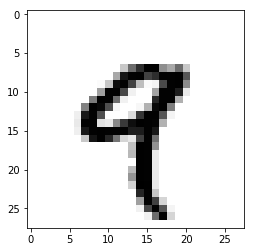

In [48]:
# Displaying digit.
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## The Neural Network

In [49]:
from keras import models
from keras import layers

# Architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
# Construction
network.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [50]:
# Data preprocessing
train_images_nn = train_images.reshape((60000, 28 * 28))
train_images_nn = train_images_nn.astype('float32') / 255

test_images_nn = test_images.reshape((10000, 28 * 28))
test_images_nn = test_images_nn.astype('float32') / 255


In [51]:
# Preparing the labels
from keras.utils import to_categorical

train_labels_nn = to_categorical(train_labels)
test_labels_nn = to_categorical(test_labels)


In [52]:
train_labels_nn # Se copdifica con dummy flags

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [53]:
# Training...
network.fit(train_images_nn, train_labels_nn, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2566 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1034 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0685 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0498 - acc: 0.9846
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0380 - acc: 0.9885


In [41]:
# Looking at the Test Set
test_loss, test_acc = network.evaluate(test_images_nn, test_labels_nn)
test_acc

10000/10000 [==============================] - 0s 46us/step


0.9812

In [66]:
# Evaluating the label of a single image with the currently trained network.
print(test_images_nn.shape)
print(test_images_nn[4,:].shape)
#probs = network.predict(test_images_nn)
pred_labels = network.predict_classes(test_images_nn)
pred_labels

(10000, 784)
(784,)


array([7, 2, 1, ..., 4, 5, 6])

In [71]:
# For a single image
pred_label = network.predict_classes(test_images_nn[4:5,]) # Pasarle un solo número (tipo 4) anda MAL (?)
# Por eso este truco...
pred_label

array([4])